<a href="https://colab.research.google.com/github/taylorec/Data-Science-with-Python/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analysis e-commerce data from Google BigQuery. 

A Tableau dashboard is available for viewing: https://public.tableau.com/shared/X8FP42YGZ?:display_count=n&:origin=viz_share_link

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
from google.cloud import bigquery
 
client = bigquery.Client(project=project_id)

In [ ]:
dc = client.query('''
SELECT 
        *
FROM
        `bigquery-public-data.thelook_ecommerce.distribution_centers`
''' ).to_dataframe()

In [ ]:
# Ecommerce Distribution Centers

dc

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
dc['state'] = dc['name'].apply(lambda name: name[-2:])

In [ ]:
dc

,id,name,latitude,longitude,state
0,1,Memphis TN,35.1174,-89.9711,TN
1,2,Chicago IL,41.8369,-87.6847,IL
2,3,Houston TX,29.7604,-95.3698,TX
3,4,Los Angeles CA,34.0500,-118.2500,CA
4,5,New Orleans LA,29.9500,-90.0667,LA
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,NJ
6,7,Philadelphia PA,39.9500,-75.1667,PA
7,8,Mobile AL,30.6944,-88.0431,AL
8,9,Charleston SC,32.7833,-79.9333,SC
9,10,Savannah GA,32.0167,-81.1167,GA


In [ ]:
orders_info = client.query('''
SELECT 
        orders.order_id,
        orders.user_id,
        users.country,
        users.age,
        users.gender,
        order_items.product_id,
        order_items.sale_price,
        FORMAT_DATE('%m/%Y', CAST(order_items.shipped_at AS DATE)) as shipped_at,
        products.category,
        products.department,
        products.distribution_center_id
FROM
        `bigquery-public-data.thelook_ecommerce.orders` orders
JOIN
        `bigquery-public-data.thelook_ecommerce.users` users ON orders.user_id = users.id
JOIN
        `bigquery-public-data.thelook_ecommerce.order_items` order_items ON orders.order_id = order_items.order_id
JOIN
        `bigquery-public-data.thelook_ecommerce.products` products ON order_items.product_id = products.id
''' ).to_dataframe()

In [ ]:
# Customer Orders
orders = orders_info.copy()
orders.head(10)

,order_id,user_id,country,age,gender,product_id,sale_price,shipped_at,category,department,distribution_center_id
0,43363,34633,Japan,56,F,8644,75.000000,10/2021,Outerwear & Coats,Women,3
1,114569,91659,Japan,63,F,10346,36.000000,12/2021,Intimates,Women,2
2,2758,2173,Brasil,29,F,15308,48.000000,None,Plus,Women,8
3,98791,79147,Brasil,15,F,7334,9.500000,11/2021,Skirts,Women,7
4,22787,18170,Brasil,61,F,2014,49.470001,06/2021,Fashion Hoodies & Sweatshirts,Women,2
5,77324,61908,Brasil,37,F,7502,59.990002,None,Blazers & Jackets,Women,5
6,85553,68521,Brasil,32,F,5049,44.990002,03/2022,Jeans,Women,4
7,85552,68521,Brasil,32,F,1567,98.000000,None,Fashion Hoodies & Sweatshirts,Women,6
8,85552,68521,Brasil,32,F,218,10.620000,None,Tops & Tees,Women,9
9,50360,40279,Brasil,29,F,5859,8.900000,09/2021,Leggings,Women,7


In [ ]:
orders.info()

# 181,183 rows, 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181183 entries, 0 to 181182
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                181183 non-null  int64  
 1   user_id                 181183 non-null  int64  
 2   country                 181183 non-null  object 
 3   age                     181183 non-null  int64  
 4   gender                  181183 non-null  object 
 5   product_id              181183 non-null  int64  
 6   sale_price              181183 non-null  float64
 7   shipped_at              117160 non-null  object 
 8   category                181183 non-null  object 
 9   department              181183 non-null  object 
 10  distribution_center_id  181183 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 15.2+ MB


In [ ]:
orders.isna().sum()

# 64,023 orders have not shipped

order_id                      0
user_id                       0
country                       0
age                           0
gender                        0
product_id                    0
sale_price                    0
shipped_at                64023
category                      0
department                    0
distribution_center_id        0
dtype: int64

In [ ]:
import pandas as pd
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])

In [ ]:
orders.describe()

,order_id,user_id,age,product_id,sale_price,distribution_center_id
count,181183.000000,181183.000000,181183.000000,181183.000000,181183.000000,181183.000000
mean,62526.056815,50034.125106,41.061027,15286.204484,59.575884,5.001082
std,36085.895528,28907.558281,16.980522,8391.898797,66.652147,2.901381
min,1.000000,1.000000,12.000000,1.000000,0.020000,1.000000
25%,31286.000000,24982.000000,26.000000,8044.000000,24.500000,2.000000
50%,62506.000000,50001.000000,41.000000,15997.000000,39.990002,5.000000
75%,93769.000000,75145.000000,56.000000,22524.000000,69.949997,8.000000
max,125019.000000,99999.000000,70.000000,29120.000000,999.000000,10.000000


In [ ]:
orders.describe(include='object')

,country,gender,category,department
count,181183,181183,181183,181183
unique,15,2,26,2
top,China,M,Intimates,Men
freq,61988,90637,13414,90637


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181183 entries, 0 to 181182
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181183 non-null  int64         
 1   user_id                 181183 non-null  int64         
 2   country                 181183 non-null  object        
 3   age                     181183 non-null  int64         
 4   gender                  181183 non-null  object        
 5   product_id              181183 non-null  int64         
 6   sale_price              181183 non-null  float64       
 7   shipped_at              117160 non-null  datetime64[ns]
 8   category                181183 non-null  object        
 9   department              181183 non-null  object        
 10  distribution_center_id  181183 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 15.2+ MB


In [ ]:
# counts per country

orders.country.value_counts()

China             61988
United States     40702
Brasil            26548
South Korea        9828
France             8479
United Kingdom     8155
Germany            7386
Spain              7315
Japan              4409
Australia          3734
Belgium            2185
Poland              432
Colombia             18
Deutschland           2
Austria               2
Name: country, dtype: int64

In [ ]:
dc[['id', 'state']]

,id,state
0,1,TN
1,2,IL
2,3,TX
3,4,CA
4,5,LA
5,6,NJ
6,7,PA
7,8,AL
8,9,SC
9,10,GA


In [ ]:
# Adding Distribution Centers to orders data set

orders['dc_state'] = orders['distribution_center_id'].map({1:'TN', 2:'IL', 3:'TX', 4:'CA', 5:'LA', 6:'NJ', 7:'PA', 8:'AL', 9:'SC', 10:'GA'})

In [ ]:
orders['sale_price'] = orders['sale_price'].apply(lambda p: round(p,2))

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181183 entries, 0 to 181182
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181183 non-null  int64         
 1   user_id                 181183 non-null  int64         
 2   country                 181183 non-null  object        
 3   age                     181183 non-null  int64         
 4   gender                  181183 non-null  object        
 5   product_id              181183 non-null  int64         
 6   sale_price              181183 non-null  float64       
 7   shipped_at              117160 non-null  datetime64[ns]
 8   category                181183 non-null  object        
 9   department              181183 non-null  object        
 10  distribution_center_id  181183 non-null  int64         
 11  dc_state                181183 non-null  object        
dtypes: datetime64[ns](1), float64(

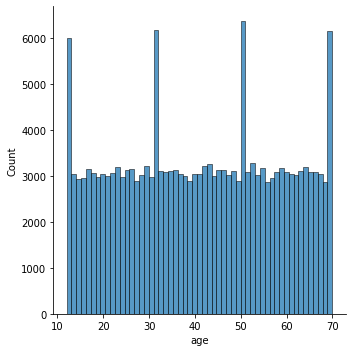

In [ ]:
# age distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['age'],kde=False)

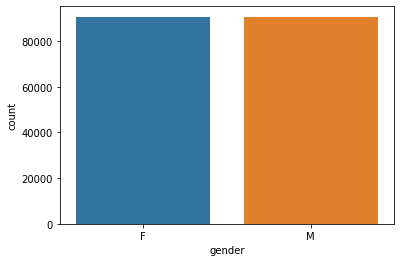

In [ ]:
# Comparing number of orders by gender

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=orders)

In [ ]:
orders['gender'].value_counts()

M    90637
F    90546
Name: gender, dtype: int64

In [ ]:
# average age by gender

orders.groupby('gender')['age'].mean()

gender
F    41.098149
M    41.023942
Name: age, dtype: float64

In [ ]:
# number of different product id's

orders['product_id'].nunique()

29063

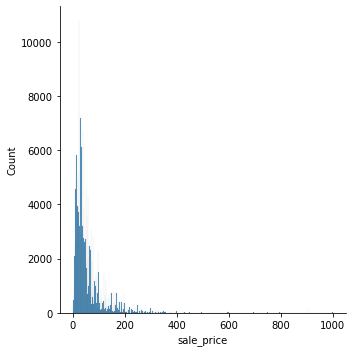

In [ ]:
# sale price distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['sale_price'],kde=False)

In [ ]:
orders['sale_price'].max()

999.0

In [ ]:
# average sales price by gender

orders.groupby('gender')['sale_price'].mean()

gender
F    55.926216
M    63.221887
Name: sale_price, dtype: float64

In [ ]:
# Order of sales numbers by category

orders['category'].value_counts().sort_values(ascending=False)

Intimates                        13414
Jeans                            12633
Tops & Tees                      11943
Fashion Hoodies & Sweatshirts    11702
Sweaters                         11158
Swim                             11116
Shorts                           10988
Sleep & Lounge                   10915
Accessories                      10016
Outerwear & Coats                 9131
Active                            9031
Underwear                         7531
Pants                             7221
Socks                             6256
Dresses                           5456
Maternity                         5225
Suits & Sport Coats               5078
Plus                              4304
Socks & Hosiery                   3918
Pants & Capris                    3329
Blazers & Jackets                 3268
Leggings                          3213
Skirts                            2149
Suits                             1042
Jumpsuits & Rompers                924
Clothing Sets            

In [ ]:
orders['department'].value_counts()

Men      90637
Women    90546
Name: department, dtype: int64

In [ ]:
orders.groupby('gender')['department'].value_counts()

# gender and department are the same

gender  department
F       Women         90546
M       Men           90637
Name: department, dtype: int64

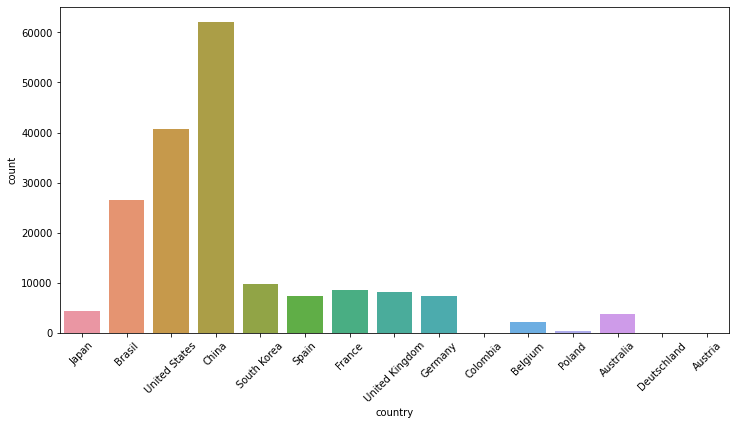

In [ ]:
# bar graph showing number of customer purchases by country

plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x='country', data=orders)

In [ ]:
# Order of sales by category for China

orders[orders['country']=='China']['category'].value_counts()

Intimates                        4646
Jeans                            4302
Tops & Tees                      4055
Fashion Hoodies & Sweatshirts    4045
Sweaters                         3839
Swim                             3821
Shorts                           3778
Sleep & Lounge                   3759
Accessories                      3480
Outerwear & Coats                3073
Active                           3001
Underwear                        2574
Pants                            2439
Socks                            2113
Dresses                          1911
Maternity                        1773
Suits & Sport Coats              1716
Plus                             1468
Socks & Hosiery                  1353
Pants & Capris                   1155
Leggings                         1152
Blazers & Jackets                1090
Skirts                            737
Suits                             339
Jumpsuits & Rompers               298
Clothing Sets                      71
Name: catego

In [ ]:
# Order of sales by category for United States

orders[orders['country']=='United States']['category'].value_counts()

Intimates                        3072
Jeans                            2831
Tops & Tees                      2782
Fashion Hoodies & Sweatshirts    2594
Sweaters                         2498
Shorts                           2489
Swim                             2442
Sleep & Lounge                   2363
Accessories                      2211
Active                           2071
Outerwear & Coats                2064
Pants                            1666
Underwear                        1664
Socks                            1336
Dresses                          1260
Suits & Sport Coats              1162
Maternity                        1156
Plus                              936
Socks & Hosiery                   891
Pants & Capris                    766
Blazers & Jackets                 738
Leggings                          706
Skirts                            499
Jumpsuits & Rompers               236
Suits                             219
Clothing Sets                      50
Name: catego

In [ ]:
# Order of sales by category for women's department

orders[orders['department']=='Women']['category'].value_counts()

Intimates                        13414
Dresses                           5456
Maternity                         5225
Swim                              5013
Fashion Hoodies & Sweatshirts     4999
Jeans                             4897
Shorts                            4626
Sleep & Lounge                    4624
Tops & Tees                       4403
Plus                              4304
Accessories                       4268
Sweaters                          4094
Socks & Hosiery                   3918
Active                            3842
Pants & Capris                    3329
Outerwear & Coats                 3316
Blazers & Jackets                 3268
Leggings                          3213
Skirts                            2149
Suits                             1042
Jumpsuits & Rompers                924
Clothing Sets                      222
Name: category, dtype: int64

In [ ]:
# Order of sales by category for men's department

orders[orders['department']=='Men']['category'].value_counts()

Jeans                            7736
Tops & Tees                      7540
Underwear                        7531
Pants                            7221
Sweaters                         7064
Fashion Hoodies & Sweatshirts    6703
Shorts                           6362
Sleep & Lounge                   6291
Socks                            6256
Swim                             6103
Outerwear & Coats                5815
Accessories                      5748
Active                           5189
Suits & Sport Coats              5078
Name: category, dtype: int64

In [ ]:
# There are 1994 different product id #'s for jeans
orders[orders['category']=='Jeans']['product_id'].value_counts()

20924    17
21182    17
21387    16
21295    16
21157    16
         ..
4307      1
4929      1
4853      1
4887      1
20987     1
Name: product_id, Length: 1994, dtype: int64

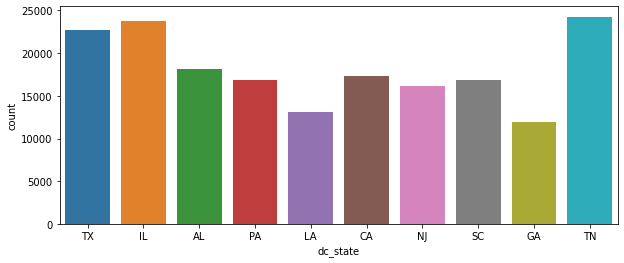

In [ ]:
# bar graph showing number of customer purchases by DC

plt.figure(figsize=(10,4))
sns.countplot(x='dc_state', data=orders)

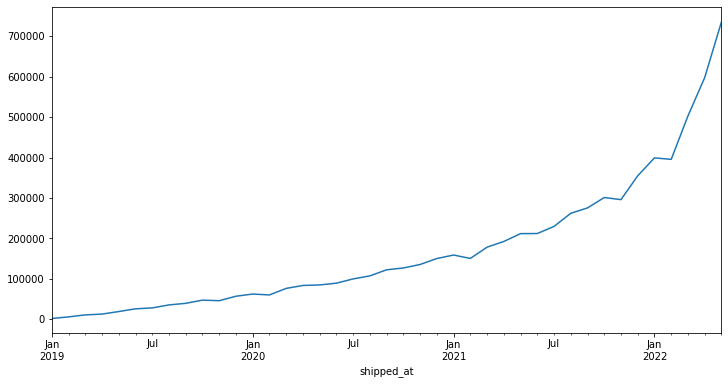

In [ ]:
# sales plot over time
plt.figure(figsize=(12,6))
orders.groupby('shipped_at')['sale_price'].sum().plot()

In [ ]:
# last ship date

orders['shipped_at'].max()

Timestamp('2022-05-01 00:00:00')

In [ ]:
# first ship date

orders['shipped_at'].min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
# Sales volume by DC

orders.groupby('dc_state')['sale_price'].sum().sort_values()

dc_state
SC     660938.54
GA     797535.55
LA     820605.65
NJ     921664.47
CA     958513.17
PA    1104934.09
AL    1205471.04
IL    1312488.50
TN    1435413.88
TX    1576572.48
Name: sale_price, dtype: float64

In [ ]:
# Sales volume by country

orders.groupby('country')['sale_price'].sum().sort_values()

country
Deutschland            74.06
Austria               159.95
Colombia              778.10
Poland              25605.00
Belgium            122197.53
Australia          225766.32
Japan              259926.36
Germany            434831.19
Spain              448646.93
United Kingdom     482649.68
France             509170.10
South Korea        595597.08
Brasil            1571489.95
United States     2434146.91
China             3683098.21
Name: sale_price, dtype: float64

In [ ]:
# Sales volume by age

Age_sales = orders.groupby('age')['sale_price'].sum().sort_values()
Age_sales

age
13    164505.10
68    166492.97
56    166679.50
39    169992.94
37    172983.63
16    172999.45
49    173948.44
20    174754.08
44    174871.70
62    175478.69
15    175482.37
27    175694.64
41    176844.32
57    177436.20
17    177603.25
54    178187.95
28    178992.17
19    179162.40
67    179207.48
70    179709.19
52    180778.24
40    180887.99
33    181224.66
30    181903.03
38    182599.79
47    182602.08
58    182737.16
31    182882.79
25    183102.02
48    183615.00
12    183801.18
65    183894.42
14    184036.41
36    185176.95
24    185241.14
21    185626.92
34    186303.72
51    186457.37
69    186564.36
61    186706.03
32    187188.47
45    187595.58
18    187727.05
66    187939.23
55    189842.49
23    190216.61
50    190302.87
60    190308.42
42    190723.05
22    190935.90
35    191195.72
46    191458.63
64    191821.45
29    192117.95
59    192235.76
53    192670.66
26    193987.08
63    194233.11
43    194469.61
Name: sale_price, dtype: float64

In [ ]:
orders[["age", "sale_price"]].corr()

# no correlation between sales and age

,age,sale_price
age,1.000000,0.000851
sale_price,0.000851,1.000000


In [ ]:
# number of unique products per category

orders.groupby('category')['product_id'].nunique()

category
Accessories                      1557
Active                           1431
Blazers & Jackets                 561
Clothing Sets                      37
Dresses                           953
Fashion Hoodies & Sweatshirts    1862
Intimates                        2356
Jeans                            1994
Jumpsuits & Rompers               162
Leggings                          561
Maternity                         896
Outerwear & Coats                1418
Pants                            1041
Pants & Capris                    608
Plus                              756
Shorts                           1761
Skirts                            366
Sleep & Lounge                   1769
Socks                             905
Socks & Hosiery                   664
Suits                             187
Suits & Sport Coats               739
Sweaters                         1733
Swim                             1793
Tops & Tees                      1865
Underwear                        1088
Nam

In [ ]:
# save data set to Google Drive

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
orders.to_csv('orders.csv')
!cp orders.csv "drive/My Drive/Projects/BigQuery/Ecommerce/"